# Hypothesis Testing Project

## Defining the Question 

Determine the total number of bluecars taken from stations in Paris between Monday-Friday

### Hypothesis


**Null Hypothesis**: There is no difference in the total number of bluecars taken from stations and the blue cars returned between Monday and Friday.(**claim**)

**Alternate Hypothesis:** There is a difference in the total number of bluecars taken and the blue cars returned between Monday and Friday.

### Context

In recent times, electric car sharing services have become popular. Knowledge of the use of car sharing services can enable companies plan.
This study seeks to determine whether the total number of bluecars shared is constant or whether it differs during the weekdays.

### Metrics for Success

*   Get a sample(s) of the data 
*   Determine the p-value
*   Reject or fail to reject the null hypothesis



  

### Experimental Design


*   Defining the research question

*   Finding and dealing with outliers, anomalies, and missing data within the dataset.

*   Plot appropriate univariate and bivariate summaries recording our observations.

*   Implement the solution by performing hypothesis testing.
*  Challenge your solution by providing insights on how you can make improvements.





### Appropriateness of Data Provided

*  The data was sourced from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). The dataset used was ranging from january to july of 2018 and is relevant for this analysis.
The data provided contains variables such as dayofweek and blue cars taken that is relevant to the question and hypothesis.



## Importing libraries to be used

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_profiling as pp

## Loading and previewing the dataset

In [ ]:
# loading the dataset and previewing the first 5 observations 
url = 'http://bit.ly/DSCoreAutolibDataset'

autolib = pd.read_csv(url)
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# kurtosis of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

for column in col:
  print((column, autob[col].kurt()))
  
# distribution of the sum of bluecars taken and sum of slots taken 
# has positive kurtosis indicating the presence of outliers
# distribution can be described as heavy-tailed

('bluecars_returned_sum', bluecars_returned_sum    5.542863
bluecars_taken_sum       5.553808
slots_freed_sum          6.007230
slots_taken_sum          6.001265
dtype: float64)
('bluecars_taken_sum', bluecars_returned_sum    5.542863
bluecars_taken_sum       5.553808
slots_freed_sum          6.007230
slots_taken_sum          6.001265
dtype: float64)
('slots_freed_sum', bluecars_returned_sum    5.542863
bluecars_taken_sum       5.553808
slots_freed_sum          6.007230
slots_taken_sum          6.001265
dtype: float64)
('slots_taken_sum', bluecars_returned_sum    5.542863
bluecars_taken_sum       5.553808
slots_freed_sum          6.007230
slots_taken_sum          6.001265
dtype: float64)


In [ ]:
# reading the columns of the dataframe
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
len(autolib.columns)

13

In [ ]:
# loading the dictionary and reading the description of columns in the dataset
desclink = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

dlink = pd.read_excel(desclink)
dlink


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# checking the number of rows and columns in the dataframe
print(autolib.shape[0]) 
print(autolib.shape[1])

# checking the no. of total observations
print(autolib.size)

#there are 16,085 rows and 13 columns
# dataframe has a total of 209,105 observations


16085
13
209105


In [ ]:
# checking the datatype of the columns and no. of non-null columns
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Data Cleaning

In [ ]:
# creating a copy of the dataframe to work on
autolib = autolib.copy()

In [ ]:
# replacing spaces with underscores and converting column names to lowercase
autolib.columns = autolib.columns.str.replace(' ', '_').str.lower()
autoel.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# checking for sum of duplicate values
autolib.duplicated().sum()

# our dataset has no duplicates

0

In [ ]:
# checking for the sum of missing values in each column

autolib.isnull().sum()

# our data has no missing values 

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [ ]:
# checking the datatypes of the columns 

autolib.dtypes

# all columns are numerical apart from date and daytype

postal_code                int64
date                      object
n_daily_data_points        int64
dayofweek                  int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

date column has an inappropriate datatype

In [ ]:
# converting date column to datetime
autolib.date = pd.to_datetime(autolib.date)

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayofweek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   bluecars_taken_sum      16085 non-null  int64         
 6   bluecars_returned_sum   16085 non-null  int64         
 7   utilib_taken_sum        16085 non-null  int64         
 8   utilib_returned_sum     16085 non-null  int64         
 9   utilib_14_taken_sum     16085 non-null  int64         
 10  utilib_14_returned_sum  16085 non-null  int64         
 11  slots_freed_sum         16085 non-null  int64         
 12  slots_taken_sum         16085 non-null  int64 

In [ ]:
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# selecting weekday columns

autolib = autolib[autolib['day_type'] == 'weekday']
# previewing the first 5 observations in the resulting dataframe
autolib.head(5)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# drop day_type column because it is constant
# drop n_daily_data_points column because it is not required

#autolib = autolib.drop(['day_type', 'n_daily_data_points'], 1)

autolib.columns
autolib

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
# using pandas to get a summarized report of the dataset
autolib.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1430.007277,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,36.882140,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,1440.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


## Exploratory Data Analysis

In [ ]:
# checking for the total sum of bluecars taken everyday

autolib.groupby('dayofweek')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

#Where 0 is monday,1 is tuesday ,2 is wednesday,3 is thursday,4 is friday
#friday has the highest number of bluecars taken

,bluecars_taken_sum
dayofweek,
4,288546
0,263893
3,263207
1,261940
2,261849


In [ ]:
autolib.groupby('dayofweek')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

# most bluecars are returned on Friday
# Where 0 is monday,1 is tuesday ,2 is wednesday,3 is thursday,4 is friday

,bluecars_returned_sum
dayofweek,
4,286029
0,264808
3,262961
2,260673
1,260470


### Univariate Analysis

#### Frequency Tables

In [ ]:
# frequency table of bluecars_returned_sum column

autolib['dayofweek'].value_counts()

0    2374
1    2363
4    2271
3    2268
2    2268
Name: dayofweek, dtype: int64

#### Measures of Central Tendency

In [ ]:
# descriptive statistics of the data

autolib.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1430.007277,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,36.882140,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,1440.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


#### Measures of Spread/Dispersion

In [ ]:
# variance of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in col:
  print((column, autolib[col].var()))

# there is a significantly high variance in the distribution of bluecars taken 

('bluecars_returned_sum', bluecars_returned_sum    28339.955275
bluecars_taken_sum       28773.286798
slots_freed_sum           2294.429896
slots_taken_sum           2289.486593
dtype: float64)
('bluecars_taken_sum', bluecars_returned_sum    28339.955275
bluecars_taken_sum       28773.286798
slots_freed_sum           2294.429896
slots_taken_sum           2289.486593
dtype: float64)
('slots_freed_sum', bluecars_returned_sum    28339.955275
bluecars_taken_sum       28773.286798
slots_freed_sum           2294.429896
slots_taken_sum           2289.486593
dtype: float64)
('slots_taken_sum', bluecars_returned_sum    28339.955275
bluecars_taken_sum       28773.286798
slots_freed_sum           2294.429896
slots_taken_sum           2289.486593
dtype: float64)


In [ ]:
# skewness of bluecars_returned_sum, bluecars_taken_sum, 
# slots_freed_sum & slots_taken_sum columns

col = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in col:
  print((column, autob[col].skew()))

  
# the distribution of bluecars taken and slots taken exhibit positive skewness (i.e., are skewed to the right)
# the modes of bluecars taken & slotes taken are less than the mean of bluecars taken and slots taken respectively.

('bluecars_returned_sum', bluecars_returned_sum    2.328973
bluecars_taken_sum       2.328198
slots_freed_sum          2.542187
slots_taken_sum          2.542346
dtype: float64)
('bluecars_taken_sum', bluecars_returned_sum    2.328973
bluecars_taken_sum       2.328198
slots_freed_sum          2.542187
slots_taken_sum          2.542346
dtype: float64)
('slots_freed_sum', bluecars_returned_sum    2.328973
bluecars_taken_sum       2.328198
slots_freed_sum          2.542187
slots_taken_sum          2.542346
dtype: float64)
('slots_taken_sum', bluecars_returned_sum    2.328973
bluecars_taken_sum       2.328198
slots_freed_sum          2.542187
slots_taken_sum          2.542346
dtype: float64)


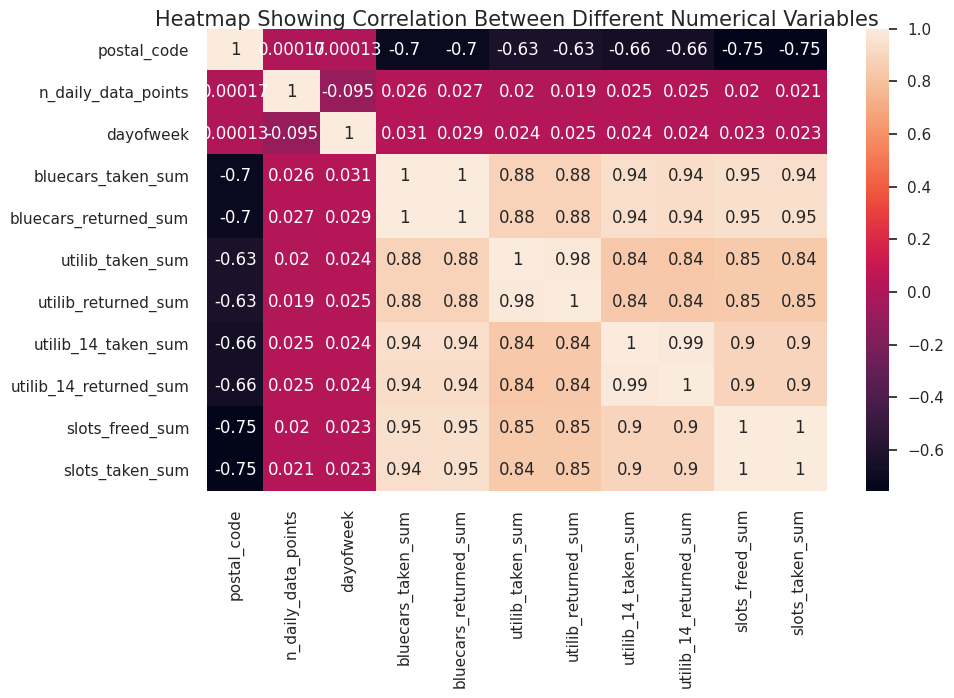

In [ ]:
#correlation
heatmap = autolib.corr()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns, annot=True)
plt.title('Heatmap Showing Correlation Between Different Numerical Variables', fontsize=15, pad=2)
plt.show()
#The correlation shows that there is a correlation between the number of  blue cars taken and blue cars returned

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


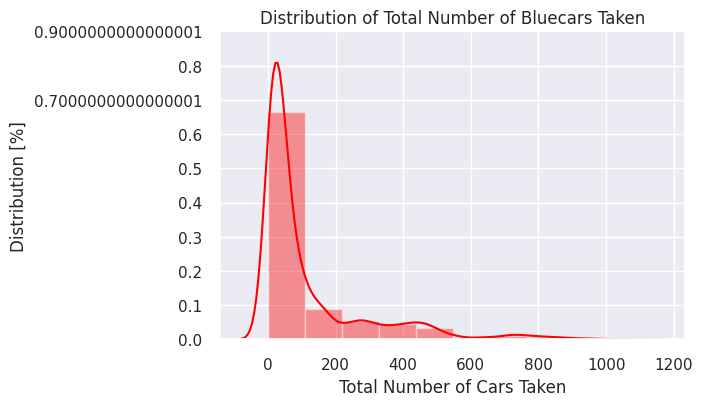

In [ ]:
# histogram showing the distribution of total number of cars taken

plt.figure(figsize=(6,4))
dis = sns.distplot(autob.bluecars_taken_sum, bins=10, color='red')
plt.xlabel('Total Number of Cars Taken')
plt.yticks(dis.get_yticks(), dis.get_yticks() * 100)
plt.ylabel('Distribution [%]', fontsize=12)
plt.title('Distribution of Total Number of Bluecars Taken')
plt.show()

# most common total number of bluecars taken was between 0-100

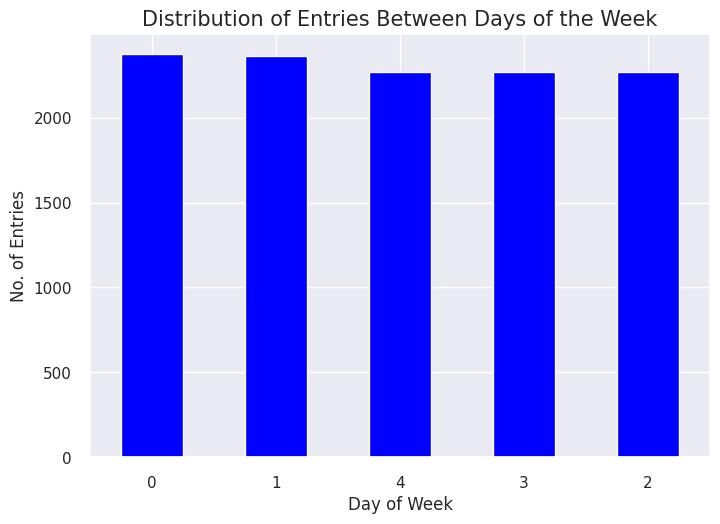

In [ ]:
# barplot showing the distribution of entries/observations between mon-fri


autolib.dayofweek.value_counts().plot(kind='bar', color='blue')
plt.xticks(rotation=360)
plt.xlabel('Day of Week')
plt.ylabel('No. of Entries')
plt.title('Distribution of Entries Between Days of the Week', fontsize=15)
plt.show()

# no. of entries for each day of week are somewhat evenly distributed ranging between 2200-2400
# monday and tuesday had slightly more entries

### Bivariate Analysis

**line graph**

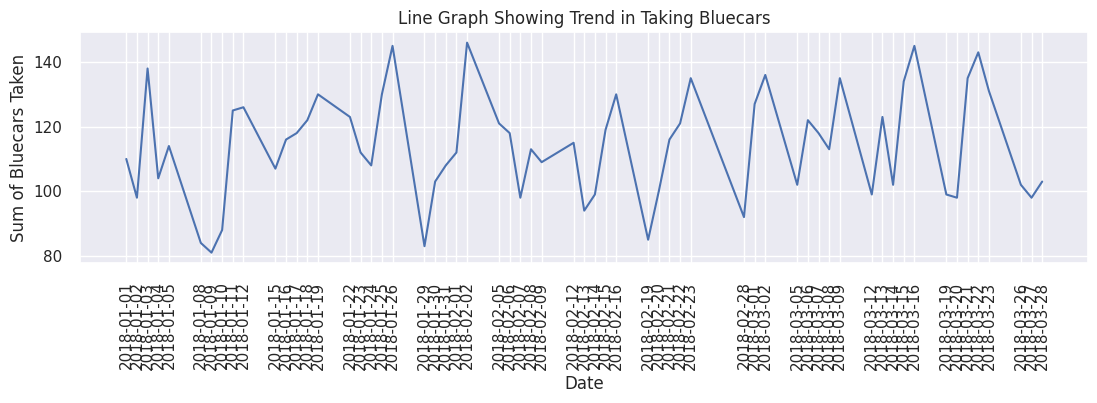

In [ ]:
lg = autolib.iloc[:41,:]   # selecting the first 40 observations from the autolib data

# plotting a line graph of sum of bluecars taken and sum of recharging slots freed
plt.figure(figsize=(13,3))
plt.plot(autm.date, autm.bluecars_taken_sum)
plt.xticks(autm.date, rotation=90)

plt.xlabel('Date')
plt.ylabel('Sum of Bluecars Taken')
plt.title('Line Graph Showing Trend in Taking Bluecars', fontsize=12)
plt.show()

# output reveals a constant fluctuation in the trend of taking bluecars
# lowest number of sum of bluecars taken was on 09/01/2018,29/01/2018 and 19/02/2018.

**scatter plot**

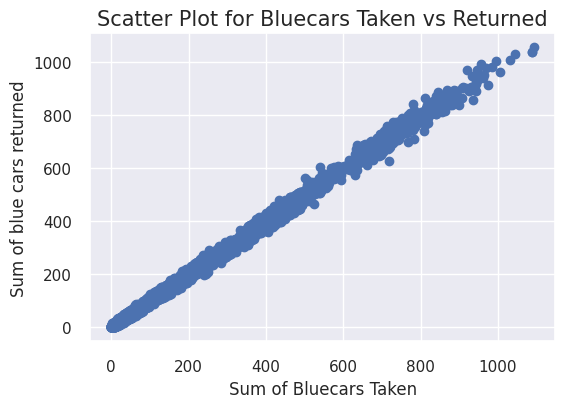

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(autolib.bluecars_taken_sum, autolib.bluecars_returned_sum)
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of blue cars returned')
plt.title('Scatter Plot for Bluecars Taken vs Returned', fontsize=15)
plt.show()

# scatter plot reveals a perfect linear relationship (i.e positive correlation) between the sum of bluecars taken and sum of bluecars returned.
# the two columns can be considered to provide the same information

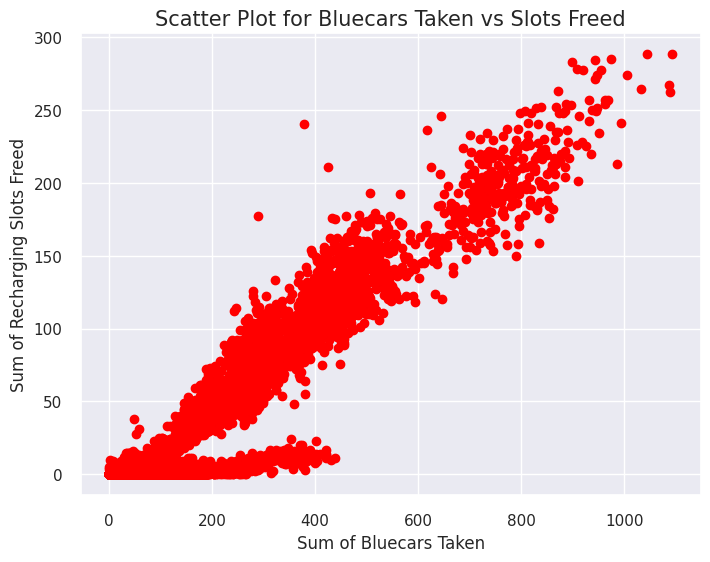

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(autob.bluecars_taken_sum, autob.slots_freed_sum, color='red')
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Recharging Slots Freed')
plt.title('Scatter Plot for Bluecars Taken vs Slots Freed', fontsize=15)
plt.show()

# scatter plot reveals sum of bluecars taken and sum of slots freed are highly correlated (i.e positive correlation)

#### Correlation

In [ ]:
# pearson/standard correlation coefficient between sum of bluecars taken and sum of blue cars returned

pearson = autolib.bluecars_taken_sum.corr(autolib.bluecars_returned_sum, method='pearson')
print(pearson)

# output reveals a perfect linear correlation between the sum of bluecars taken and the sum of bluecars returned

0.9987802776217566


## Hypothesis Testing

### Simple Sample Random Sampling

In [ ]:
# using simple random sampling to create a sample (sample 1)
# the size of the sample is 30% of the data

samp1 = autolib.sample(frac=0.3, random_state=101)
samp1.head()


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5677,92170,2018-03-09,1440,4,weekday,83,84,0,0,5,4,0,0
3738,78140,2018-06-15,1440,4,weekday,31,31,1,0,4,4,0,0
7153,92270,2018-05-31,1411,3,weekday,30,24,0,0,3,5,0,0
14707,94340,2018-01-26,1437,4,weekday,48,51,0,0,4,3,0,0
7921,92330,2018-05-08,1425,1,weekday,44,40,1,2,5,9,4,2


In [ ]:
# checking shape of sample 1
samp1.shape

# our sample (created from the autob datframe) has 3,463 rows and 11 columns 

(3463, 13)

In [ ]:
# grouping sample 1 by dayofweek and displaying sum of bluecars taken

s1 = samp1.groupby('dayofweek')[['bluecars_taken_sum']].sum().reset_index()
s1['dayofweek'] = s1['dayofweek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
s1

,dayofweek,bluecars_taken_sum
0,Monday,80151
1,Tuesday,81031
2,Wednesday,79700
3,Thursday,80698
4,Friday,89593


# Stratified sampling

In [ ]:
# Stratified sample
df4 = autolib.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5769,92190,2018-01-01,1440,0,weekday,65,67,2,2,4,4,0,0
10635,93170,2018-02-19,1420,0,weekday,35,34,1,2,10,8,0,0
13501,94120,2018-03-12,1440,0,weekday,29,31,1,2,2,1,0,0
14377,94230,2018-01-08,1438,0,weekday,41,42,1,1,3,2,0,0
9230,92420,2018-02-12,1440,0,weekday,11,14,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,75010,2018-03-09,1440,4,weekday,314,306,15,15,29,28,67,68
14381,94230,2018-01-12,1439,4,weekday,41,39,0,0,8,7,0,0
9251,92420,2018-03-09,1440,4,weekday,17,15,0,0,0,0,0,0
12210,93440,2018-01-19,1440,4,weekday,2,3,0,0,0,1,0,0


In [ ]:
# sample mean
sm= df4['bluecars_taken_sum'].mean()
sm

122.36221837088388

In [ ]:
# sample standard deviation
sd = df4['bluecars_taken_sum'].std()
sd

175.28422858775795

In [ ]:
#population mean
pm=autolib['bluecars_taken_sum'].mean()
pm

116.0286729036729

In [ ]:
# calculating the z-score
zscore = (sm-pm) / sd
zscore

0.03613300248538917

In [ ]:

#calculating the p value
import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
pvalue

0.5144118463380203

In [ ]:
#interpretation of the p value
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

autolib['bluecars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()



-6.333545467210982

Since the p value (0.5) is greater than the assumed level of significance of 0.05, we fail to reject the null hypothesis that there is no difference in the number of cars taken from stations in different days of the week.

Thus, the test results reveal that there is a negligible difference between the number of cars taken and returned from stations in different days of the week.

#### Challenge Solution

In [ ]:
# grouping the population by day of week and displaying the sum of bluecars taken each day

group_cars = autolib.groupby('dayofweek')[['bluecars_taken_sum','bluecars_returned_sum']].sum()
group_cars.head()
#it is noted that there is a very slight difference in cars taken and cars returned

,bluecars_taken_sum,bluecars_returned_sum
dayofweek,,
0,263893,264808
1,261940,260470
2,261849,260673
3,263207,262961
4,288546,286029


## Conclusion


*   Since the determined p-value is above the level of significance of 0.05 we fail to reject the null hypothesis.

*   Thus, we conclude that there is a negligible difference in the total number of cars taken from stations in different days of the week.

*   The test results are backed by the results of the groupby() function which reveal a very slight difference in the number of cars between monday - friday. 

*   An assumption taken is that highly correlated features/variables represent the same information and can therefore be used interchangeably.








